# Cargamos los Datasets

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Directorio donde se encuentran los datasets
directory = 'datasets/'

# Diccionario para almacenar los DataFrames
dataframes = {}

# Cargar todos los datasets
for filename in os.listdir(directory):
    if filename.endswith('_historical_data.csv'):
        # Extraer el nombre de la empresa del nombre del archivo
        company_name = filename.replace('_historical_data.csv', '')
        
        # Ruta completa del archivo
        file_path = os.path.join(directory, filename)
        
        # Cargar el CSV en un DataFrame
        df = pd.read_csv(file_path)
        
        # Almacenar el DataFrame en el diccionario
        dataframes[company_name] = df
        
        print(f"Cargado: {filename}")
        print(f"Forma del DataFrame: {df.shape}")
        print(f"Columnas: {df.columns.tolist()}")
        print("------------------------")

# Imprimir los nombres de las empresas cargadas
print("DataFrames cargados:")
for company in dataframes.keys():
    print(company)



Cargado: ypf_historical_data.csv
Forma del DataFrame: (676, 8)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
------------------------
Cargado: pampa_energia_historical_data.csv
Forma del DataFrame: (676, 8)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
------------------------
Cargado: ecopetrol_historical_data.csv
Forma del DataFrame: (676, 8)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
------------------------
Cargado: petrobras_historical_data.csv
Forma del DataFrame: (676, 8)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
------------------------
Cargado: interconexion_electrica_historical_data.csv
Forma del DataFrame: (676, 8)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
------------------------
Cargado: eletrobras_historical_data.csv
Forma del DataFrame: (676, 8

# Exploración de los datos

Advertimos que la columna Date se encuentra en formato object.

In [3]:
# Aplicamos la función .info() a todos los DataFrames
for company, df in dataframes.items():
    print(f"\nInformación para {company}:")
    print(df.info())
    print("-" * 50)


Información para ypf:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          676 non-null    object 
 1   Open          676 non-null    float64
 2   High          676 non-null    float64
 3   Low           676 non-null    float64
 4   Close         676 non-null    float64
 5   Volume        676 non-null    int64  
 6   Dividends     676 non-null    float64
 7   Stock Splits  676 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 42.4+ KB
None
--------------------------------------------------

Información para pampa_energia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          676 non-null    object 
 1   Open          676 non-null    float64
 2   High      

### Explicación del contenido de las columnas
* 'Date': La fecha de la información registrada.
* 'Open': El precio de apertura de la acción al inicio del día de negociación.
* 'High': El precio más alto alcanzado por la acción durante el día.
* 'Low': El precio más bajo alcanzado por la acción durante el día.
* 'Close': El precio de cierre de la acción al final del día de negociación.
* 'Volume': El número total de acciones negociadas durante el día.
* 'Dividends': Los dividendos pagados por acción, si los hubiera.
* 'Stock Splits': Divisiones de acciones, si ocurrieron.

## Transformación columna Date

### Función para extraer solo la fecha (YYYY-MM-DD)

In [4]:
def transform_date(df):
    def extract_date(date_str):
        return date_str.split()[0]
    
    # Aplicar la función a la columna 'Date'
    df['Date'] = df['Date'].apply(extract_date)
    return df

# Aplicar la transformación a todos los dataframes
for company, df in dataframes.items():
    dataframes[company] = transform_date(df)



### Convertir la columna 'Date' a datetime

In [5]:
def convert_date_column(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df

# Aplicar la conversión a todos los dataframes
for company, df in dataframes.items():
    dataframes[company] = convert_date_column(df)


### Creamos tres nuevas columnas a partir de la columna Date: Year, Month y Day

In [6]:
def add_date_columns(df):
    # Asegurarse de que 'Date' es datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Crear nuevas columnas
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    return df

# Aplicar la función a todos los dataframes
for company, df in dataframes.items():
    dataframes[company] = add_date_columns(df)

# Utilizamos la biblioteca TA-Lib (Technical Analysis Library) cuyo propósito principal es proporcionar funciones para el análisis técnico de datos de series temporales

### Resumen de los indicadores a utilizar:

* SMA (Simple Moving Average):
El SMA es uno de los indicadores más básicos y ampliamente utilizados en el análisis técnico. Calcula el promedio aritmético de los precios de cierre durante un período específico. En nuestro código, utilizamos SMA de 50 y 200 días, que son períodos comúnmente usados para identificar tendencias a largo plazo.

* EMA (Exponential Moving Average):
El EMA es similar al SMA, pero da más peso a los datos más recientes, lo que lo hace más sensible a los cambios de precio recientes. En nuestro código, usamos un EMA de 20 días. El EMA reacciona más rápidamente a los cambios de precio que el SMA, lo que puede ser útil para identificar cambios de tendencia más temprano. 

* RSI (Relative Strength Index):
El RSI es un oscilador de momentum - es decir, la fuerza o velocidad con la que cambian dos valores extremos- que mide la velocidad y el cambio de los movimientos de precios. Oscila entre 0 y 100, y tradicionalmente, se considera que un RSI por encima de 70 indica una condición de sobrecompra, mientras que un RSI por debajo de 30 indica una condición de sobreventa. 

* MACD (Moving Average Convergence Divergence):
El MACD es un indicador de tendencia y momentum que muestra la relación entre dos EMAs, típicamente de 12 y 26 períodos. El indicador consta de tres componentes: la línea MACD (diferencia entre los dos EMAs), la línea de señal (generalmente un EMA de 9 períodos de la línea MACD) y el histograma (diferencia entre la línea MACD y la línea de señal). Los traders buscan cruces entre la línea MACD y la línea de señal como señales de compra o venta. 

* ATR (Average True Range):
El ATR es un indicador de volatilidad que mide la extensión media del movimiento de precios, independientemente de la dirección. No indica la dirección del precio, sino la volatilidad del mercado. Un ATR alto indica alta volatilidad, mientras que un ATR bajo indica baja volatilidad. Los traders utilizan el ATR para establecer stop-loss y take-profit, ajustando estos niveles en función de la volatilidad actual del mercado. 

* Stochastic Oscillator:
El Oscilador Estocástico es un indicador de momentum que compara el precio de cierre actual con el rango de precios durante un período específico. Consta de dos líneas: %K (la línea principal) y %D (la media móvil de %K). Oscila entre 0 y 100, con lecturas por encima de 80 consideradas como condiciones de sobrecompra y por debajo de 20 como condiciones de sobreventa. 

* OBV (On-Balance Volume):
El OBV es un indicador de volumen acumulativo que relaciona el volumen con los cambios de precio. La premisa es que los cambios en el OBV preceden a los cambios en el precio. Cuando el precio de cierre es mayor que el anterior, el volumen del día se suma al OBV; cuando es menor, se resta. Un OBV ascendente indica que el volumen está fluyendo hacia el activo (acumulación), mientras que un OBV descendente indica que el volumen está fluyendo fuera del activo (distribución). Los traders buscan divergencias entre el OBV y el precio como señales de posibles reversiones. 

In [7]:
from ta.trend import SMAIndicator, EMAIndicator, MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.volatility import AverageTrueRange
from ta.volume import OnBalanceVolumeIndicator
import numpy as np
import pandas as pd

def add_selected_indicators(df):
    # Asegurarse de que 'Date' está ordenada
    df = df.sort_values('Date')
    
    # SMA para diferentes períodos
    df['SMA50'] = SMAIndicator(close=df['Close'], window=50).sma_indicator()
    df['SMA200'] = SMAIndicator(close=df['Close'], window=200).sma_indicator()
    
    # EMA
    df['EMA20'] = EMAIndicator(close=df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(close=df['Close']).rsi()
    
    # MACD
    macd = MACD(close=df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['MACD_Hist'] = macd.macd_diff()
    
    # ATR
    df['ATR'] = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close']).average_true_range()
    
    # Stochastic Oscillator
    stoch = StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'])
    df['Stoch_K'] = stoch.stoch()
    df['Stoch_D'] = stoch.stoch_signal()
    
    # OBV
    df['OBV'] = OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()
    
    # Volumen relativo
    df['Volume_SMA20'] = df['Volume'].rolling(window=20).mean()
    df['Relative_Volume'] = df['Volume'] / df['Volume_SMA20']
    
    # Rate of Change (ROC)
    df['ROC'] = (df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10) * 100
    
    # Características temporales
    df['Date'] = pd.to_datetime(df['Date'])  # Asegurarse de que 'Date' es datetime
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day
    
    # Retornos
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Volatilidad histórica
    df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)
    
    # Eliminar filas con NaN que puedan haberse generado
    df = df.dropna()
    
    return df

# Aplicar la función a todos los dataframes
for company, df in dataframes.items():
    dataframes[company] = add_selected_indicators(df)

# Verificar el resultado
print(dataframes['ypf'].head())
print(dataframes['ypf'].columns)

          Date  Open  High   Low  Close   Volume  Dividends  Stock Splits  \
199 2022-10-18  7.10  7.19  6.76   6.94  1466300        0.0           0.0   
200 2022-10-19  6.95  7.19  6.95   7.04  1570300        0.0           0.0   
201 2022-10-20  7.15  7.49  7.02   7.05  2881100        0.0           0.0   
202 2022-10-21  7.02  7.21  6.87   7.17  1743800        0.0           0.0   
203 2022-10-24  7.10  7.61  6.82   7.39  5172100        0.0           0.0   

     Year  Month  ...  MACD_Hist       ATR    Stoch_K    Stoch_D       OBV  \
199  2022     10  ...  -0.050104  0.403801  58.904117  55.479458  67047600   
200  2022     10  ...  -0.040226  0.392815  65.753426  64.155259  68617900   
201  2022     10  ...  -0.033603  0.398328  55.045899  59.901147  71499000   
202  2022     10  ...  -0.022271  0.394162  66.055061  62.284795  73242800   
203  2022     10  ...  -0.002149  0.422436  81.034465  67.378475  78414900   

     Volume_SMA20  Relative_Volume       ROC  Daily_Return  Volatili

In [8]:
# Aplicamos la función .info() a todos los DataFrames
for company, df in dataframes.items():
    print(f"\nInformación para {company}:")
    print(df.info())
    print("-" * 50)


Información para ypf:
<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 199 to 675
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             477 non-null    datetime64[ns]
 1   Open             477 non-null    float64       
 2   High             477 non-null    float64       
 3   Low              477 non-null    float64       
 4   Close            477 non-null    float64       
 5   Volume           477 non-null    int64         
 6   Dividends        477 non-null    float64       
 7   Stock Splits     477 non-null    float64       
 8   Year             477 non-null    int32         
 9   Month            477 non-null    int32         
 10  Day              477 non-null    int32         
 11  SMA50            477 non-null    float64       
 12  SMA200           477 non-null    float64       
 13  EMA20            477 non-null    float64       
 14  RSI              477 n

# Matriz de correlación

In [9]:
# Crear la carpeta 'matrices' si no existe
if not os.path.exists('matrices'):
    os.makedirs('matrices')

# Función para calcular la matriz de correlación para una empresa
def calculate_correlation_matrix(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_columns].corr()
    return corr_matrix

# Calcular y visualizar la matriz de correlación para cada empresa
for company, df in dataframes.items():
    print(f"Calculando matriz de correlación para {company}")
    
    corr_matrix = calculate_correlation_matrix(df)
    
    # Crear un mapa de calor
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Matriz de Correlación para {company}')
    plt.tight_layout()
    plt.savefig(f'matrices/{company}_correlation_matrix.png')
    plt.close()

    # Guardar la matriz de correlación en un CSV
    corr_matrix.to_csv(f'matrices/{company}_correlation_matrix.csv')

# Calcular una matriz de correlación promedio para todas las empresas
all_corr_matrices = []

for df in dataframes.values():
    corr_matrix = calculate_correlation_matrix(df)
    all_corr_matrices.append(corr_matrix)

average_corr_matrix = sum(all_corr_matrices) / len(all_corr_matrices)

# Visualizar la matriz de correlación promedio
plt.figure(figsize=(20, 16))
sns.heatmap(average_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación Promedio para Todas las Empresas')
plt.tight_layout()
plt.savefig('matrices/average_correlation_matrix.png')
plt.close()

# Guardar la matriz de correlación promedio en un CSV
average_corr_matrix.to_csv('matrices/average_correlation_matrix.csv')

print("Proceso completado. Se han generado matrices de correlación individuales y una matriz promedio en la carpeta 'matrices'.")

Calculando matriz de correlación para ypf
Calculando matriz de correlación para pampa_energia
Calculando matriz de correlación para ecopetrol
Calculando matriz de correlación para petrobras
Calculando matriz de correlación para interconexion_electrica
Calculando matriz de correlación para eletrobras
Calculando matriz de correlación para engie_brasil_energia
Calculando matriz de correlación para vista_energy
Calculando matriz de correlación para aes_andes
Calculando matriz de correlación para cemig
Calculando matriz de correlación para copel
Calculando matriz de correlación para enel_chile
Calculando matriz de correlación para cosan
Calculando matriz de correlación para ultrapar
Calculando matriz de correlación para companhia_siderurgica_nacional
Calculando matriz de correlación para vale
Calculando matriz de correlación para braskem
Calculando matriz de correlación para centrais_eletricas_brasileiras
Calculando matriz de correlación para companhia_paranaense_de_energia
Calculando matri

### Visualización de la matriz de correlación

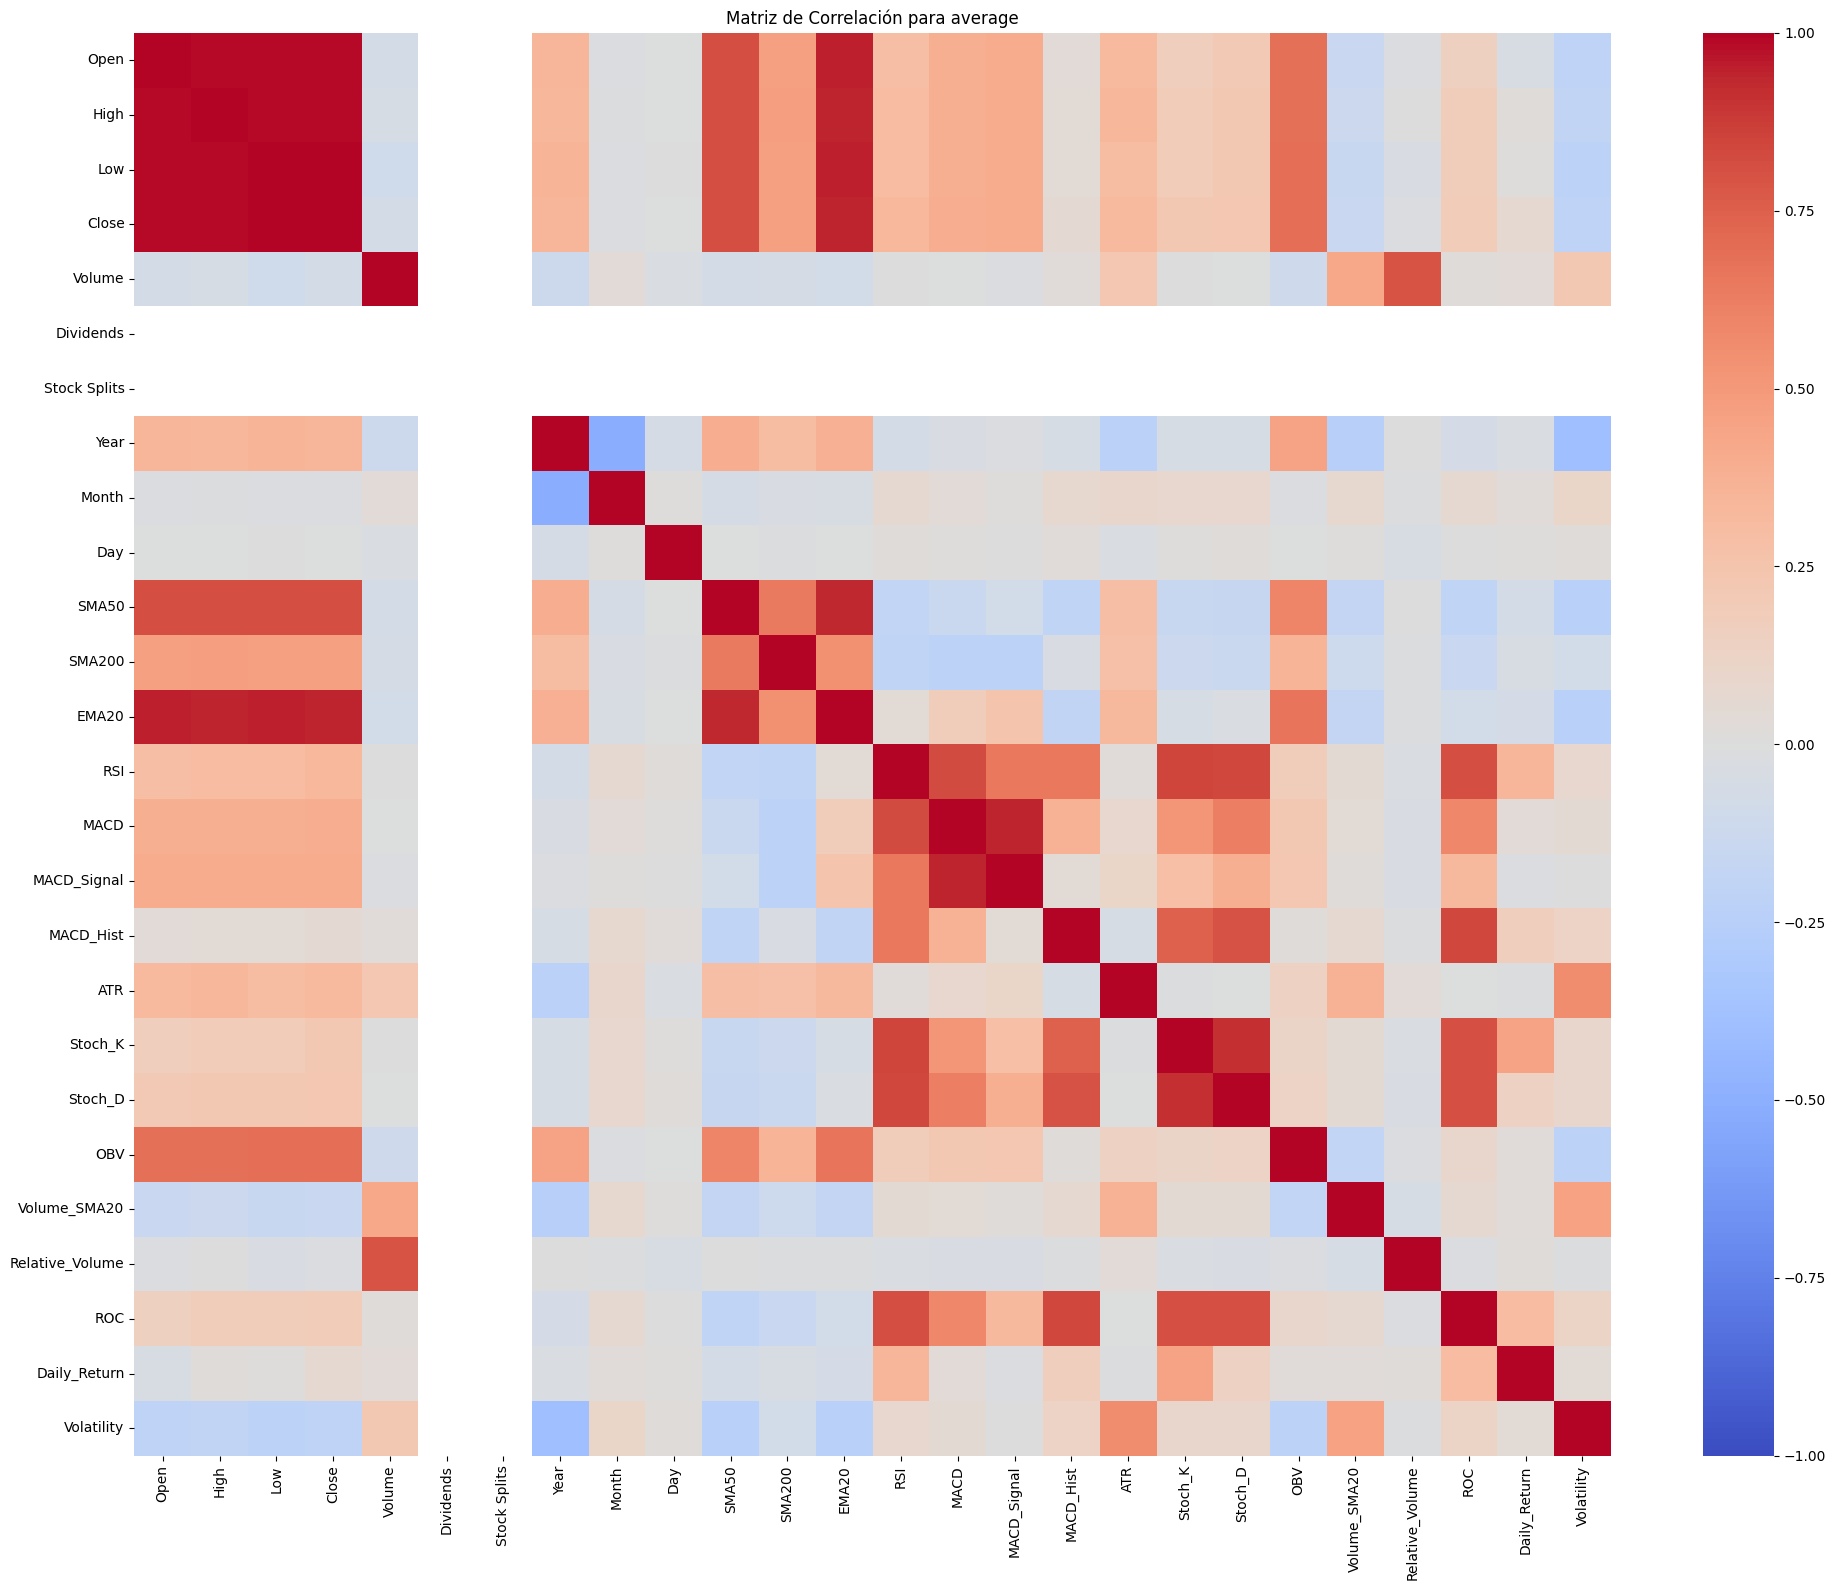

In [10]:
# Función para mostrar la matriz de correlación
def show_correlation_matrix(company):
    # Cargar la matriz de correlación desde el CSV
    corr_matrix = pd.read_csv(f'matrices/{company}_correlation_matrix.csv', index_col=0)
    
    # Crear un mapa de calor
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Matriz de Correlación para {company}')
    plt.tight_layout()
    plt.show()

# Mostrar la matriz de correlación promedio
show_correlation_matrix('average')

### Suma absoluta de correlaciones por variable

In [11]:
abs_corr_sum = average_corr_matrix.abs().sum().sort_values(ascending=False)
print("Suma de correlaciones absolutas por variable:")
print(abs_corr_sum)

Suma de correlaciones absolutas por variable:
Close              9.900986
Low                9.823314
Open               9.712058
High               9.707540
EMA20              9.059152
SMA50              8.875018
RSI                8.171573
OBV                7.506079
MACD               7.499057
Stoch_D            7.163154
Stoch_K            7.100075
ROC                7.059550
SMA200             6.420337
MACD_Signal        6.242566
Year               5.857860
MACD_Hist          5.702884
ATR                5.139408
Volatility         5.013831
Volume_SMA20       4.233599
Volume             3.577773
Daily_Return       3.027647
Month              2.496294
Relative_Volume    2.266333
Day                1.317151
Stock Splits       0.000000
Dividends          0.000000
dtype: float64


### Elección de variables para el modelo

Atendiendo la salida de la matriz de correlación, podemos concluir que las siguientes variables pueden ser consideradas para un modelo predictivo de series temporales considerando sus correlaciones:

* Close (9.900986)
Dejamos fuera a Open, High y Low pues están muy fuertemenete correlacionadas entre sí con Close. Esto puede introducir información redundante. Además, Close refleja el consenso final del mercado para ese día, lo que puede ser más significativo para nuestro modelo.
* EMA20 (9.059152)
* SMA50 (8.875018) 
* RSI (8.171573)
* OBV (7.506079)
* MACD (7.499057)
* Stoch_D (7.163154)
* Stoch_K (7.100075)
* ROC (7.059550)

* Volume_SMA20 (4.233599)
Es fundamental incluir Volume en nuestro modelo, a pesar de que se encuentre màs abajo en la correlación. Un movimiento de precios respaldado por un alto volumen se considera más significativo y sostenible. Adeicionalmente,el volumen proporciona información única y complementaria que no está presente en los indicadores basados únicamente en precios.
Por otro lado, La elección de Volume_SMA20 sobre el volumen simple se justifica porque muestra más correlación. Además, el promedio móvil(en este caso de los últimos 20 días)suaviza las fluctuaciones diarias más extremas y nos muestra una visión más clara de la tendencia.

**Variable Objetivo: Daily_Return (Rendimiento Diario)**
Es el cambio porcentual en el precio de cierre de un activo financiero de un día de trading al siguiente. Se calcula típicamente como:

Daily_Return = (Precio de Cierre Hoy - Precio de Cierre Ayer) / Precio de Cierre Ayer

O expresado en porcentaje:

Daily_Return = ((Precio de Cierre Hoy / Precio de Cierre Ayer) - 1) * 100

Al ser porcentual, y no precio absoluto, permite comparar más fácilmente el rendimiento entre diferentes activos. Además, los rendimientos tienden a tener propiedades estadísticas más manejables que los precios brutos, a menudo acercándose a una distribución normal lo que facilita la creación del modelo. Finalmente, es más realista predecir la dirección y el cambio de los precios y no el precio absoluto futuro0.



# Guardamos los nuevos Datasets que vamos a usar en el modeo.

In [12]:

# Lista de columnas a mantener
columns_to_keep = [
    'Date', 'Close', 'EMA20', 'SMA50', 'RSI', 'OBV', 'MACD', 
    'Stoch_D', 'Stoch_K', 'ROC', 'Volume_SMA20', 'Daily_Return',
    'Year', 'Month', 'Day'
]

def select_columns(df):
    return df[columns_to_keep]

def save_dataframe(df, company_name):
    # Crear la carpeta si no existe
    if not os.path.exists('datasets_modelo'):
        os.makedirs('datasets_modelo')
    
    # Guardar el DataFrame
    file_path = f'datasets_modelo/{company_name}_model_data.csv'
    df.to_csv(file_path, index=False)
    print(f"Dataset guardado para {company_name} en {file_path}")

# Procesar cada DataFrame y guardarlo
for company, df in dataframes.items():
    # Seleccionar las columnas
    df_model = select_columns(df)
    
    # Guardar el nuevo DataFrame
    save_dataframe(df_model, company)

print("Proceso completado. Todos los datasets han sido guardados en la carpeta 'datasets_modelo'.")

# Verificar el contenido de un DataFrame (por ejemplo, el primero)
first_company = list(dataframes.keys())[0]
print(f"\nMostrando las primeras filas y columnas del dataset de {first_company}:")
print(pd.read_csv(f'datasets_modelo/{first_company}_model_data.csv').head())
print("\nColumnas en el nuevo dataset:")
print(pd.read_csv(f'datasets_modelo/{first_company}_model_data.csv').columns.tolist())

Dataset guardado para ypf en datasets_modelo/ypf_model_data.csv
Dataset guardado para pampa_energia en datasets_modelo/pampa_energia_model_data.csv
Dataset guardado para ecopetrol en datasets_modelo/ecopetrol_model_data.csv
Dataset guardado para petrobras en datasets_modelo/petrobras_model_data.csv
Dataset guardado para interconexion_electrica en datasets_modelo/interconexion_electrica_model_data.csv
Dataset guardado para eletrobras en datasets_modelo/eletrobras_model_data.csv
Dataset guardado para engie_brasil_energia en datasets_modelo/engie_brasil_energia_model_data.csv
Dataset guardado para vista_energy en datasets_modelo/vista_energy_model_data.csv
Dataset guardado para aes_andes en datasets_modelo/aes_andes_model_data.csv
Dataset guardado para cemig en datasets_modelo/cemig_model_data.csv
Dataset guardado para copel en datasets_modelo/copel_model_data.csv
Dataset guardado para enel_chile en datasets_modelo/enel_chile_model_data.csv
Dataset guardado para cosan en datasets_modelo/c